In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as pt

In [4]:
df = pd.read_csv('malware.csv')
df.head()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


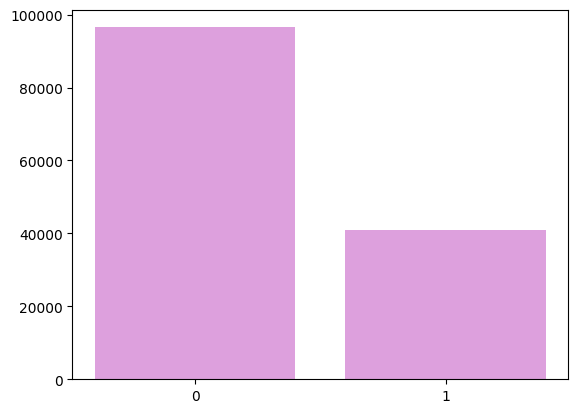

In [5]:
pt.bar(x = ['0', '1'], height = df['legitimate'].value_counts(), color='plum');

Epoch 1/20
2749/2749 [==============================] - 8s 3ms/step - loss: 0.2356 - accuracy: 0.9233 - val_loss: 0.1386 - val_accuracy: 0.9553
Epoch 2/20
2749/2749 [==============================] - 6s 2ms/step - loss: 0.1647 - accuracy: 0.9470 - val_loss: 0.1353 - val_accuracy: 0.9565
Epoch 3/20
2749/2749 [==============================] - 8s 3ms/step - loss: 0.1535 - accuracy: 0.9500 - val_loss: 0.1337 - val_accuracy: 0.9549
Epoch 4/20
2749/2749 [==============================] - 6s 2ms/step - loss: 0.1523 - accuracy: 0.9528 - val_loss: 0.1287 - val_accuracy: 0.9570
Epoch 5/20
2749/2749 [==============================] - 8s 3ms/step - loss: 0.1446 - accuracy: 0.9535 - val_loss: 0.1281 - val_accuracy: 0.9574
Epoch 6/20
2749/2749 [==============================] - 6s 2ms/step - loss: 0.1634 - accuracy: 0.9539 - val_loss: 0.1171 - val_accuracy: 0.9578
Epoch 7/20
2749/2749 [==============================] - 7s 3ms/step - loss: 0.1676 - accuracy: 0.9540 - val_loss: 0.1170 - val_accuracy:

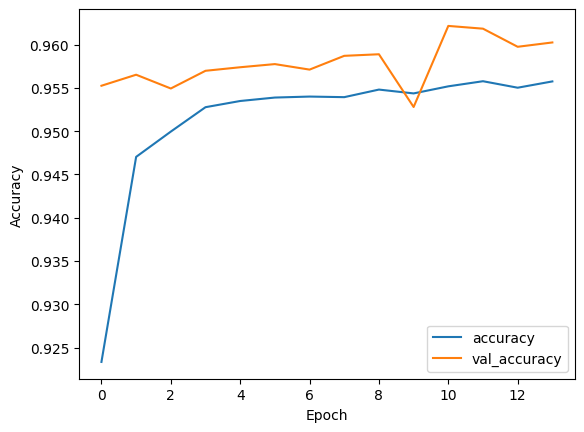

In [6]:
data = pd.read_csv('malware.csv')
x = data.drop('legitimate', axis=1)
y = data['legitimate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)
pt.plot(history.history['accuracy'], label='accuracy')
pt.plot(history.history['val_accuracy'], label = 'val_accuracy')
pt.xlabel('Epoch')
pt.ylabel('Accuracy')
pt.legend(loc='lower right')
pt.show()

In [14]:
preds = model.predict(x_test_scaled)
preds_bin = (preds > 0.5).astype(int)
true = 0
false = 0
for i in range(len(y_test)):
  if(y_test.iloc[i] == preds_bin[i]):
    true += 1
  else:
    false += 1

860/860 [==============================] - 2s 2ms/step


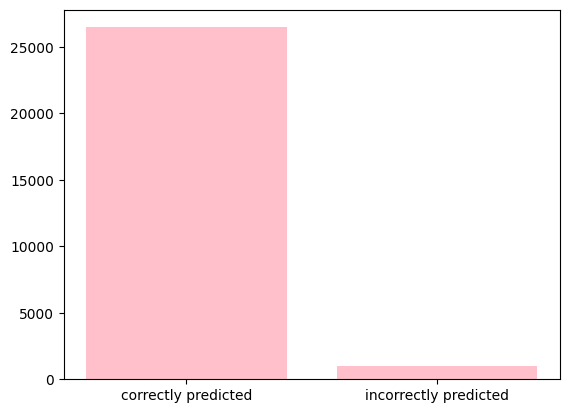

In [19]:
pt.bar(x=['correctly predicted', 'incorrectly predicted'], height=[true, false], color='pink');